# CSE 146 Lab 3: Algorithmic Fairness

### ASSIGNED: Tueday, October 20
### DUE: Tuesday, October 29
### 100 points total

In this homework, you will gain experience with tools for implementing classifiers that provide fairness guarantees. In part 2, you will try to get a fair classifier if you only have access to a normal classifier. In parts 3 and 4, you will get to explore the different outcomes when using different definitions of fairness for classifiers. You will also look at the tradeoffs between fairness and accuracy. 

All cells where code is required are marked with a "# YOUR CODE HERE" comment. All cells where a written answer is required are marked with "Please type your answers here!". The point values for each code block are written in the header for the associated subsection.

## Instructions 
For each question, you should write Python code to compute the answer to the questions that renders in a readable way according to the specifications of the question. You may only use the packages provided in the Background and Setup code. We will not be installing any packages during grading, and code that does not compile will negatively affect your grade.

This assignment can be done collaboratively, and please be sure to list the student(s) you worked with in the space provided below. Please reach out to each other if you have any questions or difficulties.

Be sure to rename this homework notebook (in [YOUR NAME HERE] so that it includes your name. 

### List the student(s) you worked with on this assignment here:
1. Zachary Zulanas
2. [person 2]
3. [etc.]

## Part 1: Importing Data (5 Points)
Before working with the algorithms for fair classification, we must first import the dataset we wish to use. We will again be working with the "Communities and Crime" dataset from [UC Irvine's Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/communities+and+crime). It includes data about the different types of crimes among various communities, socioeconomic and racial data about each community, and information about the police force in each community.

The algorithms will require that your data is split into 3 DataFrames:

- `dataX`: The features of each instance, not including any protected attributes
- `dataA`: The protected attributes of each instance
- `dataY`: The label for each instance (the value to be predicted)

Currently, we provide you with 2 CSV files:

- `communities.csv`, which contains all information for each instance
- `communities_protected.csv`, which is a single-row dataframe, indicating how each column within `communities.csv` should be used. If the column value is 0 the attribute is unprotected, if its 1 the attribute is a protected feature, and 2 if the attribute is the value to be predicted (the label for each instance).

In part 2, we will focus on only one of the protected features. In parts 3 and 4, we will use all 18 protected features for upholding our fairness metrics.

Write code to generate the 3 Pandas DataFrames, `dataX`, `dataA` and `dataY`. 

*Hint: Remember how we checked for DataFrame values in Lab1 via dataframe[dataframe == some_val], and read pandas' .dropna() function for dataframes!*

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd # Necessary libraries
import numpy as np
import warnings # Suppressing warnings
warnings.filterwarnings('ignore') 

In [3]:
# YOUR CODE HERE
dataframe = pd.read_csv("communities.csv")
mask  = pd.read_csv("communities_protected.csv")

dataX = dataframe.loc[:,(mask!=1).any()]
dataA = dataframe.loc[:,(mask==1).any()]

dataY = dataX[['ViolentCrimesPerPop']]
dataX = dataX.iloc[:,:-1]

In [4]:
print('dataX Shape:', dataX.shape)
print('dataA Shape:', dataA.shape)
print('dataY Shape:', dataY.shape)

dataX Shape: (1994, 104)
dataA Shape: (1994, 18)
dataY Shape: (1994, 1)


## Part 2: Two-Group Fairness via Post-processing (35 Points)

In this section, you will implement a method of achieving a fair classifier "from scratch" by post-processing a generic linear regression classifier. If you'd like to read about it in depth, this method is described in depth in https://arxiv.org/abs/1610.02413. 

You will train a classifier which approximately equalizes both True Positive Rate and False Positive Rate for two groups, which is commonly referred to as the Equalized Odds criterion.

### 2.1: Training a Real-Valued Predictor (5 points)

So far we've been working with classifiers that predict 0 or 1 scores. There are also models, like linear regression, that predict real-values scores. For now, you can think of these real-valued scores as the estimated probability that that instance's classification should be 1.

Now, you will train a real-valued predictor. Use the Linear Regression package from SciKit-Learn to train a regression model on dataX and dataY. Generate predictions for dataY (called y_hat_score) and print them. 

NOTE: Please make sure to do a train/test split, as this is a general practice in machine learning.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [5]:
from sklearn import linear_model

lin = linear_model.LinearRegression()

split = 1400

dataX_train = dataX.iloc[:split,:].copy()
dataX_test  = dataX.iloc[split:,:].copy()
dataY_train = dataY.iloc[:split,:].copy()
dataY_test  = dataY.iloc[split:,:].copy()

lin.fit(dataX_train,dataY_train)

y_hat_score = lin.predict(dataX_test)

In [6]:
print(y_hat_score)

[[ 4.72331171e-02]
 [-5.92331642e-02]
 [ 8.50879921e-01]
 [ 2.15518365e-01]
 [ 5.54857886e-01]
 [-1.74606880e-02]
 [ 9.57364181e-02]
 [ 7.39211990e-03]
 [-2.17783718e-01]
 [-7.61167012e-02]
 [ 3.15576211e-01]
 [ 2.32233771e-02]
 [ 2.13038214e-01]
 [ 7.90119636e-01]
 [ 1.21508139e-01]
 [ 8.73048555e-02]
 [ 1.53655046e-01]
 [-1.09766947e-01]
 [ 9.46412781e-03]
 [-7.68878958e-02]
 [ 3.90699870e-01]
 [ 5.35733862e-01]
 [ 5.01692872e-03]
 [ 8.90632533e-02]
 [-6.34965373e-02]
 [ 9.72350223e-02]
 [-3.06318121e-03]
 [ 2.55372768e-01]
 [ 6.70337982e-01]
 [ 8.02534046e-02]
 [-5.04501407e-02]
 [ 4.24222792e-01]
 [ 6.50531297e-01]
 [ 3.18279797e-02]
 [-1.61536029e-01]
 [ 1.75537399e-01]
 [ 1.01490533e+00]
 [-8.91905971e-02]
 [ 4.81069980e-01]
 [-1.10146484e-01]
 [ 3.35079883e-01]
 [ 9.14459272e-01]
 [ 9.11896303e-02]
 [ 2.86207200e-01]
 [ 4.61525126e-01]
 [ 1.43888008e-01]
 [ 3.32542055e-01]
 [ 5.25847695e-02]
 [-1.58365341e-01]
 [ 1.57778686e-01]
 [ 7.40564033e-01]
 [ 6.74087403e-01]
 [ 1.4160137

### 2.2: Binary Classification via Thresholding (5 points)

We will need to convert our estimated probabilities to 0/1 predictions. Write a function (named threshold_predictions) which takes in a set of predicted linear regression scores, a threshold, and converts the scores to 0/1 predictions (below or equal to threshold $\to$ 0, above threshold $\to$ 1). Print out your converted predictions using a threshold of 0.5.

In [7]:
def threshold_predictions(y_hat_score, threshold):
    y_hat_0_1 = y_hat_score.copy()
    for i in range(0, y_hat_0_1.shape[0]):
        if y_hat_0_1[i,0] <= threshold:
            y_hat_0_1[i,0] = 0
        else:
            y_hat_0_1[i,0] = 1
    return y_hat_0_1

In [8]:
y_hat_0_1 = threshold_predictions(y_hat_score, 0.5)

### 2.3: Computing TPR and FPR (5 points)

There are many peformance measurements for machine learning classifiers. We now introduce two new ones, true positive rate and false positive rate. We define them using the terminology from a confusion matrix:

\begin{equation}
TruePosRate = \frac{True Positive}{True Positive + False Negative}
\end{equation}

\begin{equation}
FalsePosRate = \frac{False Positive}{False Positive + True Negative}
\end{equation}

Write functions which compute the true positive rate and false positive rate, given vectors for true labels (y) and binary predictions (y_hat).



In [9]:
# YOUR CODE HERE
def true_positive_rate(y, y_hat):
    true_positive  = 0
    false_negative = 0
    for i in range(0, y.shape[0]):
        if y[i,0] == 1:
            if y_hat[i,0] == 1:
                true_positive  += 1
            else:
                false_negative += 1
    return ((true_positive)/(true_positive+false_negative))

def false_positive_rate(y, y_hat):
    true_negative  = 0
    false_positive = 0
    for i in range(0, y.shape[0]):
        if y[i,0] == 0:
            if y_hat[i,0] == 0:
                true_negative  += 1
            else:
                false_positive += 1
    return ((false_positive)/(false_positive+true_negative))

Now, we compute the TPR and FPR for your predictions from 2.2.

In [10]:
print(true_positive_rate(dataY_test.values, y_hat_0_1))
print(false_positive_rate(dataY_test.values, y_hat_0_1))

0.5906432748538012
0.07092198581560284


### 2.4: Computing ROC Curves (5 points)

ROC (receiver operating characteristic) curves measure the tradeoff between true positive and false positive rates when thresholding a real-valued predictor. We discussed them in class, but this statquest video can be helpful: https://www.youtube.com/watch?v=4jRBRDbJemM

Write a function that:
- takes in a set of true labels in {0,1} (such as dataY), a set of predictions within interval [0,1] (such as y_hat_score), and a single integer `num_thresholds`, representing the number of thresholds. 
- Evenly divide the range [0,1] into `num_thresholds` equally sized intervals. (For example, if num_thresholds = 100, your thresholds should be 0.00, 0.01, 0.02, ... , 0.99.) 
- For each interval, using the bottom of the interval as a threshold,  compute the TPR and FPR of the thresholded predictions.

Then, using your function, compute TPR and FPR arrays for `dataY`, `y_hat_score` and `num_thresholds` at 100. (Hint: see numpy's `arange` function)

In [11]:
def compute_roc_curve(y, y_hat_score, num_thresholds):
    # Your code here
    tpr = np.zeros(num_thresholds)
    fpr = np.zeros(num_thresholds)

    for i in range(0, num_thresholds):
        y_hat_0_1 = threshold_predictions(y_hat_score,i/num_thresholds)
        fpr[i]    = false_positive_rate(y,y_hat_0_1)
        tpr[i]    = true_positive_rate(y,y_hat_0_1)
    # End of your code
    return tpr, fpr


In [12]:
tpr, fpr = compute_roc_curve(dataY_test.values, y_hat_score, 100)

### 2.5: ROC Curve Comparison (5 points)

The code below is copied from our solution to Lab 1. It splits the data into two groups (A and B) based on whether the proportion of some attribute is greater than some threshold. We use it to split our data depending on whether the proportion of African American people in a community is greater than 50%. Run the cell below.

In [13]:
## RUN THIS CELL
## DO NOT MODIFY

def split_on_feature(dataX, dataY, dataA, column, thresh):
    rows_A = []
    rows_B = []
    for i in range(dataX.shape[0]):
        if dataA[i, column] < thresh:
            rows_A.append(i)
        else:
            rows_B.append(i)
    
    X_A = dataX[rows_A, :]
    X_B = dataX[rows_B, :]
    y_A = dataY[rows_A]
    y_B = dataY[rows_B]
    
    return X_A, X_B, y_A, y_B  


# change 2 to whatever racepctblack is
X_A, X_B, y_A, y_B = split_on_feature(dataX.values, dataY.values, dataA.values, 0, 0.5)

Using the generated arrays (X_A, X_B, y_A, y_B) and your function from 2.4, produce a matplotlib plot showing the ROC curves for each group with 100 threshold values. Use your trained linear regression model for predictions. Your X axis should be FPR and your Y axis should be TPR. Refer to Homework 1 for a reminder on how to use matplotlib.

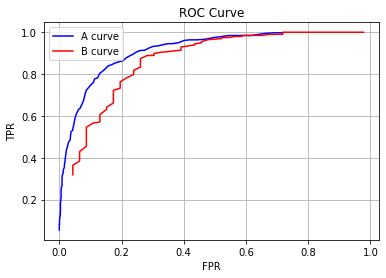

In [14]:
%matplotlib inline 
import matplotlib.pyplot as plt

## YOUR CODE HERE

y_A_hat = lin.predict(X_A)
y_B_hat = lin.predict(X_B)

tpr_A, fpr_A = compute_roc_curve(y_A, y_A_hat, 100)
tpr_B, fpr_B = compute_roc_curve(y_B, y_B_hat, 100)

plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_A, tpr_A, color='blue', label='A curve')
plt.plot(fpr_B, tpr_B, color='red' , label='B curve')
plt.grid(True)

plt.legend()

plt.show()

### 2.6: Minimizing Unfairness (5 points)

There are many, many different definitions of unfairness. For this lab, we'll be using the **Equalized Odds Criterion**, where we check if the ROC curves of two groups are the same. We check its "fairness error" via: $|TPR_A - TPR_B| + |FPR_A - FPR_B|$

There are 10,000 possible pairs of thresholds of the form $(a,b)$ where $a$ is the threshold for A and $b$ is the threshold for B in data plotted above. Find and print out the pair of thresholds which minimizes this "fairness error". (Graphiaclly, this translates to finding points which are closest between the two ROC curves)

In [15]:
## YOUR CODE HERE
min_unfairness_A_thresh = 100
min_unfairness_B_thresh = 100
min_error = 100
for j in range(0 , 100):
    for i in range (0 , 100):
        equalized_error = (abs(tpr_A[i]-tpr_B[j])+abs(fpr_A[i]-fpr_B[j]))
        if min_error > equalized_error:
            min_error = equalized_error
            min_unfairness_A_thresh = i/100
            min_unfairness_B_thresh = j/100

In [16]:
print((min_unfairness_A_thresh, min_unfairness_B_thresh))

(0.05, 0.43)


### 2.7: Evaluating Accuracy (5 points)

Compute `fair_acc`, the overall accuracy when using the thresholds from 2.6 on their respective groups. Compare this `max_acc`, to the single-value threshold in {0.00, 0.01, 0.02, ... , 0.99} that maximizes overall accuracy.

In [17]:
## YOUR CODE HERE

def acc(y,y_hat):
    true_value = 0
    for i in range(0, y.shape[0]):
        if y[i,0] == y_hat[i,0]:
            true_value += 1
    return (true_value)/(y.shape[0])

fair_acc_A = acc(y_A,threshold_predictions(y_A_hat,min_unfairness_A_thresh))
fair_acc_B = acc(y_B,threshold_predictions(y_B_hat,min_unfairness_B_thresh))
fair_acc   = (fair_acc_A + fair_acc_B)/2

max_acc    = 0

y_hat_ = lin.predict(dataX)
for i in range (0,100):
    y_hat_temp  = threshold_predictions(y_hat_,i/100)
    temp_acc    = acc(dataY.values, y_hat_temp)
    if temp_acc > max_acc:
        max_acc = temp_acc

In [18]:
print((fair_acc,max_acc))

(0.7088103044496488, 0.872617853560682)


## Part 3: Equalized Odds vs. Demographic Parity (30 Points)

In this section, we will revisit the equalized odds criterion and investigate further. Specifically, we will compare this fairness metric to another one -- demographic parity. This comparison will give us some insight into how various fairness metrics may or may not interact with each other.

### 3.1 Revisit Equalized Odds (5 points)

In the previous problem, you plotted the fairness error of the equalized odds criterion for two thresholds, one for each group. Now, we want just one threshold, therefore we need to have the error computed that is associated with each group.

For each threshold $(0.00, 0.01... 0.99)$, compute the equalized odds unfairness from part 2. Make sure to save these results in a specified variable. Note: it's important that the ordering of this array is the same as the threshold array.

In [19]:
### YOUR CODE HERE
equalized_odds = np.zeros(100)

for i in range(0, 100):
    equalized_odds[i] = abs(tpr_A[i]-tpr_B[i])+abs(fpr_A[i]-fpr_B[i])

### 3.2 Demographic Parity (5 points)

Intuitively demographic parity says that the ratio of the group in the whole population will be the same as the ratio of the group in the predicted classes. Formally for protected attribute $G$ and classifier $\hat{Y}$, this can be specified as $$ P(G = g | \hat{Y} = y) = P(G = g).$$

The demographic parity unfairness can be computed as $$ \sum_{g, y} | P(G = g | \hat{Y} = y) - P(G = g) | .$$

Write a function to compute the demographic parity error.

In [20]:
### YOUR CODE HERE
def demographic_parity_error(y_hat_a,y_hat_b):
    error_A = np.unique(y_hat_a, return_counts=True)
    error_B = np.unique(y_hat_, return_counts=True)
    
    d_p_e =  abs(error_A[1][0]/(error_A[1][0] + error_B[1][0]) - (y_hat_a.shape[0]/dataY.shape[0]))
    
    d_p_e += abs(error_B[1][0]/(error_A[1][0] + error_B[1][0]) - (y_hat_b.shape[0]/dataY.shape[0]))
    
    d_p_e += abs(error_A[1][1]/(error_A[1][1] + error_B[1][1]) - (y_hat_a.shape[0]/dataY.shape[0]))
    
    d_p_e += abs(error_B[1][1]/(error_A[1][1] + error_B[1][1]) - (y_hat_b.shape[0]/dataY.shape[0]))

    return d_p_e

Write a function that computes an array of demographic parity errors given a list of thresholds. Note: The thresholds need to be all in the same order as the equalized odds thresholds.

In [21]:
### YOUR CODE HERE
dem_parity = np.zeros(100)

for i in range(0,100):
    threshold_A   = threshold_predictions(y_A_hat,i/100)
    threshold_B   = threshold_predictions(y_B_hat,i/100)
    dem_parity[i] = demographic_parity_error(threshold_A, threshold_B)

### 3.3 Combine Equalized Odds & Demographic Parity (5 points)

Now that you have computed the errors for both fairness metrics -- equalized odds and demographic parity -- we can investigate further into our comparison, which will be achieved by correlating the error for both. 

Currently, both errors exist as 'columns', or vectors. We would like to combine them into a single matrix $[equalized\:odds\:error, demographic\:parity\:error]$. 

Sort the row of the matrix in ascending order according to the equalized odds error. This ordering will enable us to complete the next part.

In [22]:
### YOUR CODE HERE

sorted_eo = equalized_odds.copy()
sorted_eo.sort()
sorted_dp = dem_parity.copy()
sorted_dp.sort()
combined_eo_dp = np.stack((sorted_eo,sorted_dp),axis=0)

### 3.4 Visualization of Equalized Odds vs. Demographic Parity (5 points)

Now, we want to visualize this comparison. Plot the two rows of the matrix (from 3.3) as two separate line graphs. When plotted, you will notice a particular trend, specifically in the direction of the lines for equalized odds and demographic parity.

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import random

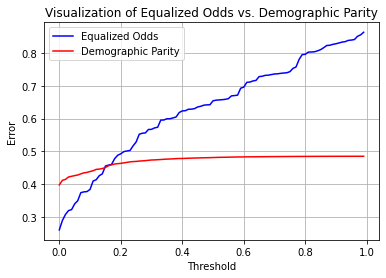

In [24]:
### YOUR CODE HERE

plt.title('Visualization of Equalized Odds vs. Demographic Parity')
plt.xlabel('Threshold')
plt.ylabel('Error')

thresholds = np.zeros(100)
for i in range(0,100):
    thresholds[i] = i/100

plt.plot(thresholds, combined_eo_dp[0], color='blue', label='Equalized Odds')
plt.plot(thresholds, combined_eo_dp[1], color='red' , label='Demographic Parity')

plt.grid(True)

plt.legend()

plt.show()


### 3.5 Now You Pick! (10 points)

From this [Towards Data Science article](https://towardsdatascience.com/a-tutorial-on-fairness-in-machine-learning-3ff8ba1040cb), choose another definition of fairness. Explain here why you are interested in investigating this definition, and mention a scenario where it could be violated.

Please type your answers here!

Now, just like you did earlier in part 3, plot this error against those for demographic parity and equalized odds.

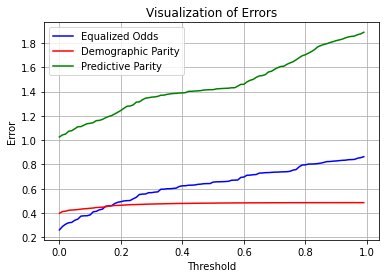

In [25]:
### YOUR CODE HERE

def predictive_parity(y_hat_a, y_hat_b):
    error_A = np.unique(y_hat_a, return_counts=True)
    error_B = np.unique(y_hat_b, return_counts=True)
    
    p_p_e  = abs(error_A[1][0]/(y_hat_a.shape[0]) - ((error_A[1][0] + error_B[1][0])/dataY.shape[0]))
    
    p_p_e += abs(error_A[1][1]/(y_hat_a.shape[0]) - ((error_A[1][0] + error_B[1][0])/dataY.shape[0]))
    
    p_p_e += abs(error_B[1][0]/(y_hat_b.shape[0]) - ((error_A[1][1] + error_B[1][1])/dataY.shape[0]))
    
    p_p_e += abs(error_B[1][1]/(y_hat_b.shape[0]) - ((error_A[1][1] + error_B[1][1])/dataY.shape[0]))  
        
    return p_p_e

pred_error = np.zeros(100)


for i in range(0,100):
    threshold_A   = threshold_predictions(y_A_hat,i/100)
    threshold_B   = threshold_predictions(y_B_hat,i/100)
    pred_error[i] = predictive_parity(threshold_A,threshold_B)
    


plt.title('Visualization of Errors')
plt.xlabel('Threshold')
plt.ylabel('Error')

thresholds = np.zeros(100)
for i in range(0,100):
    thresholds[i] = i/100

pred_error.sort()
    
plt.plot(thresholds, combined_eo_dp[0], color='blue', label='Equalized Odds')
plt.plot(thresholds, combined_eo_dp[1], color='red' , label='Demographic Parity')
plt.plot(thresholds, pred_error, color='green' , label='Predictive Parity')

plt.grid(True)
plt.legend()

plt.show()
    

## Part 4: Short Response Questions (30 Points)

**Question 1 (5 points):** Below is a gif of a heatmap which shows how false positive disparity change for specific subgroups as the Learner and Auditor interact in each round. Each square represents a subgroup, the z-axis is the fairness disparity of that subgroup. What does it mean when the heatmap is \"flat\"?
![heatmap](./heatmap.gif)

The higher the overall flow means that the fairness is unbalanced. When the graph is flat horizontally then we have a balance.

**Question 2 (5 points):** In Part 2, you should have seen that the accuracy for the fair thresholds was much larger than the error the accuracy-maximizing threshold. Suppose that you are allowed to randomize between thresholds (randomly switch between thresholding on fairness and thresholding on accurate thresholds). Is this a smart approach to maximizing accuracy while maintaining fairness? Can you think of a better approach?

The accuracy for fair thresholds wasn't larger than the accuracy-maximizing threshold. I would say that while it would maximize accuracy it would lower the fairness of the model. A much better approach is to pick a threshold that has an overal best scenario for both fairness and accuracy, trying to keep them as balanced as possible.

**Question 3 (5 points):** What is the relationship between error of a fair classifier and the number of protected attributes? That is, if we increase the number of protected attributes, would you expect the error to increase, decrease, or stay the same?

The number of protected attributes increases error in two ways. First, by having less features to analyze with the algorithm the model is less accurate, as it may be underfitted. Second, as shown before, having protected attributes may increase fairness, but at the cost of overall accuracy, as the model has to adapt to a less accurate model that respects the fairness.

**Question 4 (5 points):** Was accuracy a good measure to evaluate each threshold in part 2.7? Why or why not?

It is important to always calculate the accuracy because it gives an understanding as to how effective the algorithm was at creating a model that correctly predicts the data. While accuracy is important, it shouldn't be the only measure to be taken into account

**Question 5 (5 points):** Take a look at your plot from 3.4. Thinking of the trends in the two lines, what is the relationship between equalized odds and demographic parity? What could this possibly mean for how fairness measures interact in general?

Both errors increase as the thresholds increase, but for large thresholds the equalized odds error seems to be much higher. They seem to interact with each other, as they comlement each other to paint the whole picture of what is happending.

**Question 6 (5 points):** Provide an interpretation of your plot from 3.5. Keep in mind again the trends of the two lines. 

Apparently, my predictive parity error mas much higher than my other errors. Also, it has a similar growth to that of the demographic parity error. This is because while very fair, the predictive parity approach lacks severely in accuracy when compared to other approaches.